<a href="https://colab.research.google.com/github/ushatk-coder/customer-churn-prediction/blob/main/uber_fare__prediction_usha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("uber.csv")
df_uber=df.copy()

In [ ]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


-Uber.csv has 200k entries.total 9 columns, of which 'Unnamed: 0', 'Key' features  are not required.
-Pickup_datetime is Object data type and requires conversion to Date type.
- 'dropoff_longitude' and dropoff_latitude' both have 1 null value and requires cleaning. the next step would be to complete above tasks


In [ ]:
df_clean= df_uber.copy()
df_clean['pickup_datetime'] = pd.to_datetime(df_uber['pickup_datetime'])
df_clean.drop(columns=['Unnamed: 0', 'key'], inplace=True)
df_clean = df_clean.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [ ]:
df_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Invalid data Observations in  dataset

- negative fare_amounts
- latitudes and longitudes out of range
- max passenger count 208, whereas taxi service can have max 6

next task would be to clean all these invalid data



In [ ]:

#cleaning invalid data
# Latitude and longitude

df_clean = df_clean[
    df_clean['pickup_latitude'].between(-90, 90) &
    (df_clean['pickup_latitude'] != 0) &
    df_clean['dropoff_latitude'].between(-90, 90) &
    (df_clean['dropoff_latitude'] != 0) &
    df_clean['pickup_longitude'].between(-180, 180) &
    (df_clean['pickup_longitude'] != 0) &
    df_clean['dropoff_longitude'].between(-180, 180)
  ]

#dropping  negative fare amounts
df_clean = df_clean[df_clean['fare_amount'] > 0]

#dropping rows with  passenger_count more than 6 and zero passenger
df_clean = df_clean[df_clean['passenger_count'].between(1, 6)]
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 195321 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        195321 non-null  float64            
 1   pickup_datetime    195321 non-null  datetime64[ns, UTC]
 2   pickup_longitude   195321 non-null  float64            
 3   pickup_latitude    195321 non-null  float64            
 4   dropoff_longitude  195321 non-null  float64            
 5   dropoff_latitude   195321 non-null  float64            
 6   passenger_count    195321 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 11.9 MB


In [ ]:
df_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000
mean,11.352250,-73.903515,40.687100,-73.899947,40.686294,1.690074
std,9.804411,2.780468,2.651607,2.811123,2.658604,1.306076
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735272,1.000000
50%,8.500000,-73.982102,40.753276,-73.980521,40.753724,1.000000
75%,12.500000,-73.968318,40.767537,-73.965314,40.768320,2.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000


now the data description shows invalid data has been removed.

We move on to Feature Engineering

Next with regard to features in the data set, pickup_datetime has year, moth, hour and dayofweek together. this being a shared taxi service data, fares are dependent on whether its week end, peak hours, which day of the week, so have created seperate feature for each of them , so that it would be of help at the time of training the model.

Another feature which would  be of interest in taxi service is the distance covered as it also has an impact on fares. So from the latitudes and longitudes provided have created a distance column.

In [ ]:
#Feature engineering
#creating year,month,dayofweek,hour from pickup_datetime feature

df_clean['year'] = df_clean['pickup_datetime'].dt.year
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['dayofweek'] = df_clean['pickup_datetime'].dt.dayofweek
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

#distance claculation with the help of google reference.


def haversine_np(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
    R = 6371
    pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude= map(np.radians, [pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude])
    distlon = dropoff_longitude - pickup_longitude
    distlat = dropoff_latitude - pickup_latitude
    a = np.sin(distlat/2)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(distlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))


df_clean['distance_km'] = haversine_np(
    df_clean['pickup_latitude'],
    df_clean['pickup_longitude'],
    df_clean['dropoff_latitude'],
    df_clean['dropoff_longitude']
)
df_clean.describe()



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,distance_km
count,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000,195321.000000
mean,11.352250,-73.903515,40.687100,-73.899947,40.686294,1.690074,2011.740857,6.283851,3.049549,13.491862,4.737408
std,9.804411,2.780468,2.651607,2.811123,2.658604,1.306076,1.861530,3.439421,1.946834,6.515049,89.152531
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735272,1.000000,2010.000000,3.000000,1.000000,9.000000,1.255805
50%,8.500000,-73.982102,40.753276,-73.980521,40.753724,1.000000,2012.000000,6.000000,3.000000,14.000000,2.157664
75%,12.500000,-73.968318,40.767537,-73.965314,40.768320,2.000000,2013.000000,9.000000,5.000000,19.000000,3.911085
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,8708.233063


from the above statistic, we can see that distance_km, max is 8708, which is impossible for a shared taxi ride, so working on it in the below steps

task is to drop rides showing distances more than 200 km


In [ ]:
#would like to drop distances more than 200 km

df_clean = df_clean[df_clean['distance_km'] < 200]
df_clean.describe()
df_clean.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
year,int32
month,int32
dayofweek,int32


Relationship between Features in dataset

Our next task is to prepare a correlation chart to check the relationships between different features with the Target Feature


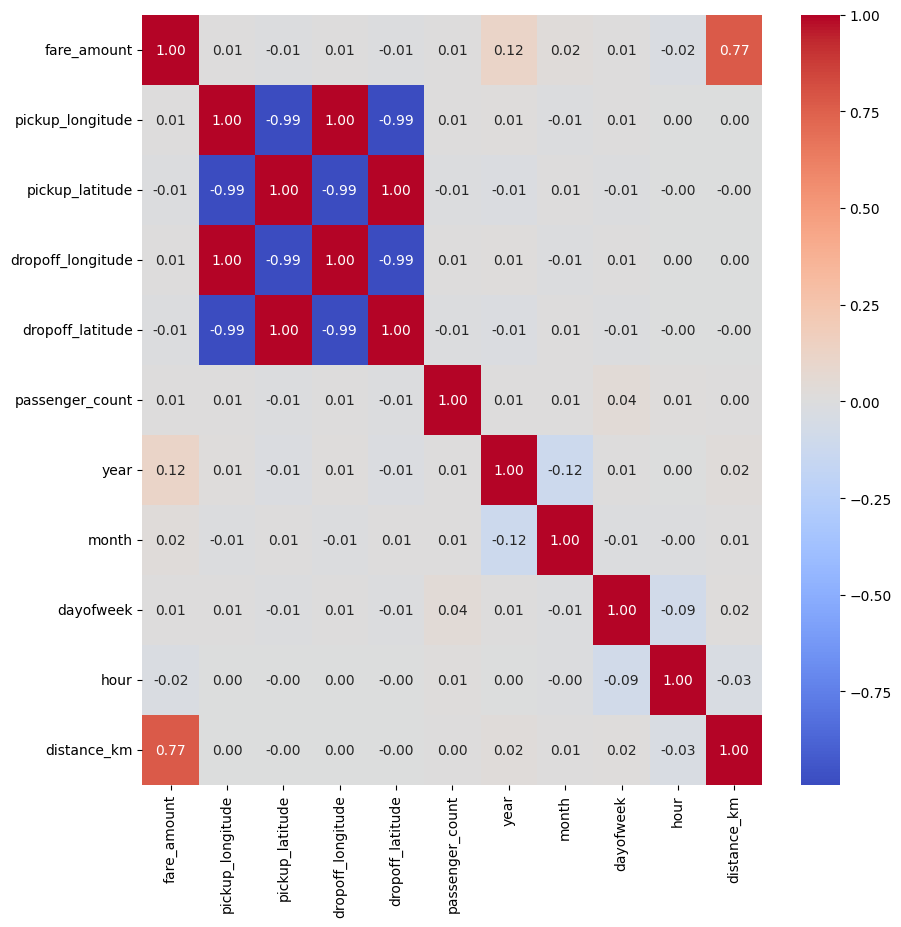

In [ ]:
# correlation heat map using matplot lib
plt.figure(figsize=(10,10))
# Create a temporary DataFrame for correlation to exclude non-numeric and irrelevant columns
df_corr = df_clean.drop(columns=['pickup_datetime'])
sns.heatmap(df_corr.corr(),
annot=True,
fmt=".2f",
cmap="coolwarm")
plt.show()

Observations from Correaltion chart

- Distance shows strong positive correlation
- Year , month, hour, dayofweek shows weak correlation
- pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude shows multicollinearity

 -we can infer that Distance_km drives Fare_amount, and is the most influential feature
 - year, hour, dayofweek show weak correlation with Fare_amount but are contextual modifiers , which are non-linear relationships
 - A contextual modifier is a variable that does not directly drive the outcome on its own, but changes the effect of other variables depending on the context.It adjusts or influences the main relationship rather than acting as the main cause.
 Fare_amount does increase because its a peak time ride, but the same distance may cost more at 8 pm and less at 2 pm due to
 peak hours, traffic, demand.

 - Chart also shows multicollinearity

  pickup_longitude ↔ dropoff_longitude ->   1.00

  pickup_latitude ↔ dropoff_latitude ->  +1.00

  pickup_longitude ↔ pickup_latitude ->  -0.99

  dropoff_longitude ↔ dropoff_latitude ->  -0.99

  these features contain almost same information
  they are not independent of each other
  pickup and drop lat and lon are goegraphically related

  Our next action plan on these observation would be
  drop off redundant features exhibiting multicollinearity
  as data has derived information in the feature distance_km.


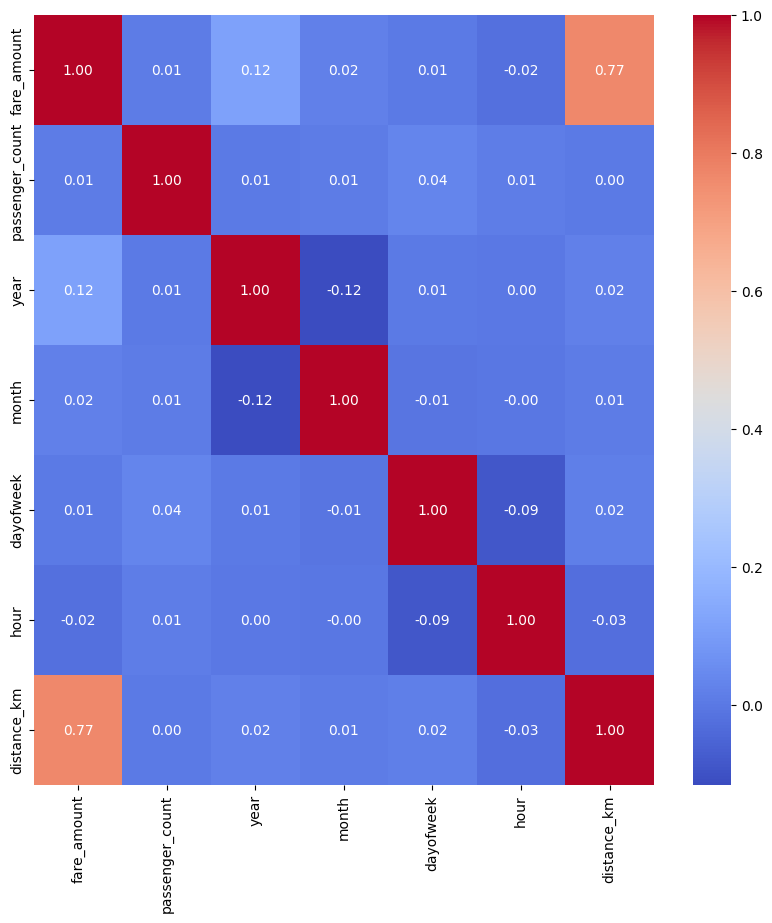

In [ ]:
#Dropping Lat and longitude columns
df_new_corr = df_clean.drop(columns=['pickup_datetime'])
df_new_corr=df_clean.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','pickup_datetime'])
#Revised Corr chart after removing collinearity features
plt.figure(figsize=(10,10))
# Create a temporary DataFrame for correlation to exclude non-numeric and irrelevant columns
df_corr = df_new_corr
df_new_corr= df_clean
sns.heatmap(df_corr.corr(),
annot=True,
fmt=".2f",
cmap="coolwarm")
plt.show()

After removing highly correlated spatial features, the revised correlation matrix shows no significant multicollinearity among the selected predictors. Trip distance exhibits a strong positive correlation with fare amount (0.77), while temporal features such as hour, day of week, and month display weak linear relationships, indicating their role as contextual modifiers rather than direct predictors.

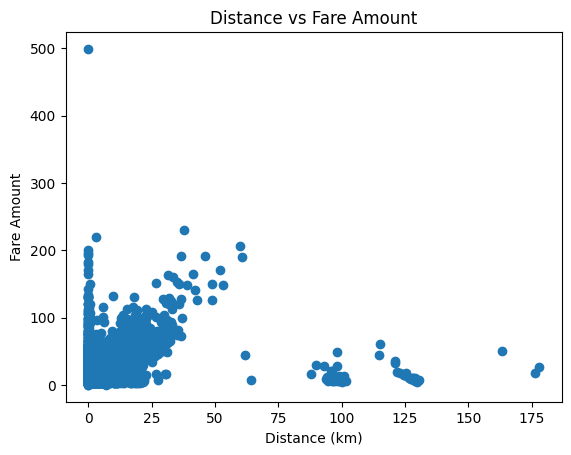

In [ ]:
#Target feature analysis
#preparing scatter plot between distance and fare_amount
plt.scatter(df_clean['distance_km'], df_clean['fare_amount'])
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.title('Distance vs Fare Amount')
plt.show()

- Scatter chart shows positive relationship between distance_km and Fare_amount
- it also shows that for distances betwwen  0-25 km, wide fare variation
- Outliers  
- Very high fare at near-zero distance
may be due to

Data entry error
toll charges
Price surge

-Long distances with surprisingly low fares may be due to shared rides, data error

let me examine the OUtliers




In [ ]:
# Extreme Outliers
df_clean[(df_clean['fare_amount'] > 100) & (df_clean['distance_km'] < 0.5)]
mask = (df_clean['distance_km'] < 0.5) & (df_clean['fare_amount'] > 100)
count_extreme = mask.sum()

print("Extreme outlier rows:", count_extreme)

Extreme outlier rows: 27


In [ ]:
mask=df_clean[(df_clean['fare_amount'] >0.5) & (df_clean['distance_km'] > 100)]#
count_extreme = mask.shape[0]
print("Extreme outlier rows:", count_extreme)

Extreme outlier rows: 30


     there were 30 rows with almost zero fare and long distances and 27 rows with almost zero distances and high fares.
     both seem not very possible, and 100 km threshold was chosen as unban rides generally fall within 100 km.

     so would drop these extreme outliers
     

In [ ]:
mask = (df_clean['fare_amount'] < 0.5) & (df_clean['distance_km'] > 100)
df_clean = df_clean.loc[~mask]
mask=df_clean[(df_clean['fare_amount'] <0.5) & (df_clean['distance_km'] > 100)]#
count_extreme = mask.shape[0]
print("Extreme outlier rows:", count_extreme)

Extreme outlier rows: 0


In [ ]:
mask = (df_clean['fare_amount'] > 100) & (df_clean['distance_km'] < 0.5)
df_clean = df_clean.loc[~mask]
mask = (df_clean['distance_km'] < 0.5) & (df_clean['fare_amount'] > 100)
count_extreme = mask.sum()

print("Extreme outlier rows:", count_extreme)

Extreme outlier rows: 0


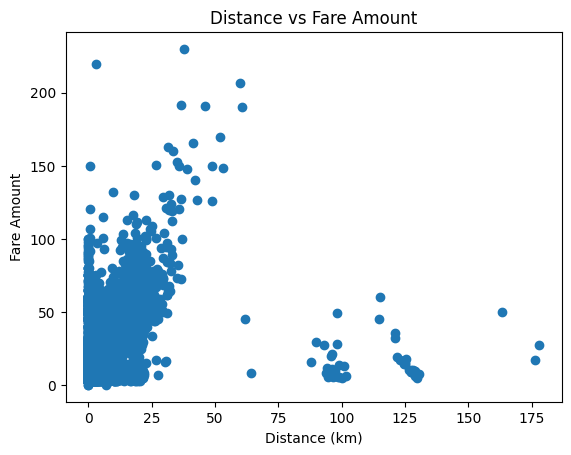

In [ ]:
#Target feature analysis
#preparing scatter plot between distance and fare_amount
plt.scatter(df_clean['distance_km'], df_clean['fare_amount'])
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.title('Distance vs Fare Amount')
plt.show()

The distance and fare_amount relationship appears linear for short trips but becomes non-linear for longer distances. Now that outliers are handled, now would like to check target feature distribution.

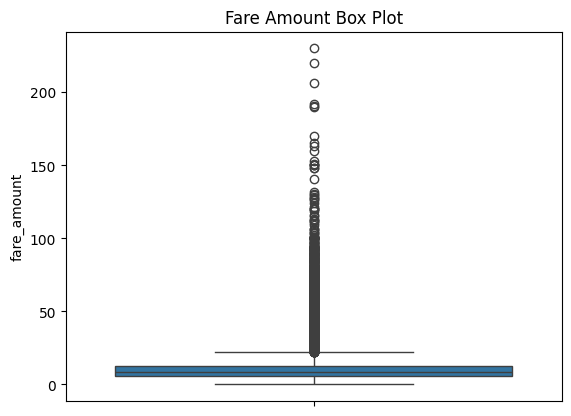

In [ ]:
#box plot for target feature 'Fare amount'
sns.boxplot(df_clean['fare_amount'])
plt.title('Fare Amount Box Plot')
plt.show()

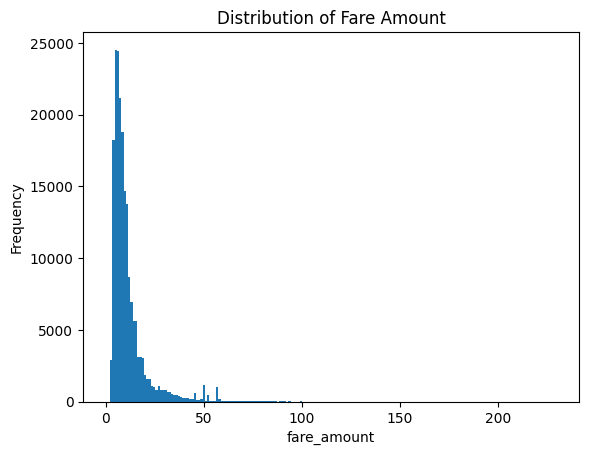

In [ ]:

import matplotlib.pyplot as plt

plt.hist(df_clean['fare_amount'], bins=200)
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()


Fare_amount is right skewed, so next would be to log transform same

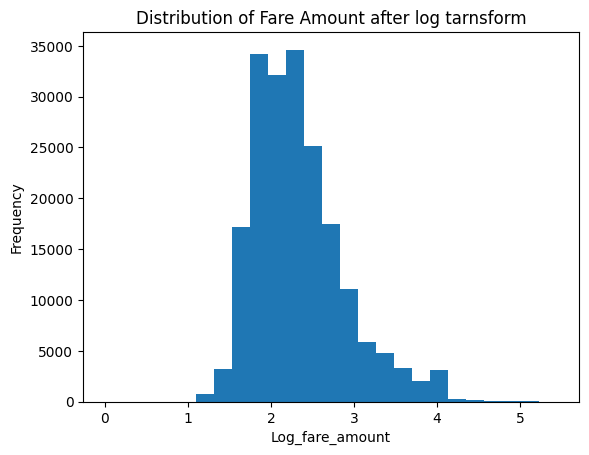

In [ ]:
#Log transformation of Target feature fare_amount

df_clean['log_fare_amount'] = np.log1p(df_clean['fare_amount'])


plt.hist(df_clean['log_fare_amount'], bins=25)
plt.xlabel('Log_fare_amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount after log tarnsform')
plt.show()


In [ ]:
from scipy.stats import skew

print(skew(df_clean['fare_amount']))
print(skew(df_clean['log_fare_amount']))


3.472796693748687
0.978001558594617


Please see above the skewness of data before and after log tarnsformation of Target feature. EDA has been completed and move on to Train test split.

In [ ]:
# train test split
X = df_clean.drop(columns=['fare_amount','log_fare_amount','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pickup_datetime'])
y = df_clean['log_fare_amount']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(156189, 6) (39048, 6)
(156189,) (39048,)


we already saw thru statitics 75 percentile is short trips, let us cap the 99th percentile to address the outlier problem.


Observations during EDA process.

Uber dataset has many invalid data
- invalid latitude and longitude
- pickup and drop off remains same, so distance shown as 0, but fares are high
- long distances but fare amount is less
- unable to calculate fare per km, as distances are zero

Regression models

The chart comparing distance and fare_amount shows that dataset has still some  outliers and non linearity among longer distances and linearity at shorter distances. WOuld like to check with a baseline Linear Regression model and then compare with Random forest, Gradient Boost,Decision Treee Regressor.

Below next steps in that direction


In [ ]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression R2:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)

Linear Regression R2: 0.5763102224303289
Linear Regression RMSE: 0.35520208029004635
Linear Regression MAE: 0.1578025171915989


In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import metrics


rf = RandomForestRegressor(
n_estimators=300,
max_depth=15,
min_samples_split=10,
min_samples_leaf=5,
max_features='sqrt',
random_state=42,
n_jobs=-1)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

RFM_R2 = r2_score(y_test, y_pred)
RFM_MAE = mean_absolute_error(y_test, y_pred)
RFM_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RFM R2 Score:",RFM_R2)
print("RFM MAE: ", RFM_MAE)
print("RFM RMSE:", RFM_RMSE)

RFM R2 Score: 0.8082806532785196
RFM MAE:  0.16070512443588272
RFM RMSE: 0.23893758944533364


In [ ]:
#Gradient Boost Regression Model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("GBr MSE:", mse)
print("GBR R2:", r2)
print("GBR MAE:", mae)
print("GBR RMSE:", rmse)

GBr MSE: 0.05676139601363272
GBR R2: 0.8093880814102534
GBR MAE: 0.15943596526115125
GBR RMSE: 0.23824650262623526


In [ ]:
#Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("DTR R2:",r2_dt)
print("DTR MAE:",mae_dt)
print("DTR RMSE:",rmse_dt)

In [ ]:
#KNN regression Model

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(x_train, y_train)
y_pred_knn = knn_pipeline.predict(x_test)

r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"KNN R2: {r2_knn}")
print(f"KNN MAE: {mae_knn}")
print(f"KNN RMSE: {rmse_knn}")

KNN R2: 0.7530276653340916
KNN MAE: 0.18818033306884246
KNN RMSE: 0.271191242768297


In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'K-Nearest Neighbors'],
    'R2': [r2_lr, RFM_R2, r2, r2_dt, r2_knn],
    'MAE': [mae_lr,RFM_MAE, mae, mae_dt, mae_knn],
    'RMSE': [rmse_lr,RFM_RMSE,rmse, rmse_dt, rmse_knn]
})

print("\nModel Performance Summary:")
print(results.round(4).set_index('Model'))


Model Performance Summary:
                         R2     MAE    RMSE
Model                                      
Linear Regression    0.5763  0.1578  0.3552
Random Forest        0.8083  0.1607  0.2389
Gradient Boosting    0.8094  0.1594  0.2382
Decision Tree        0.5962  0.2325  0.3468
K-Nearest Neighbors  0.7530  0.1882  0.2712


 Gradient Boosting (best overall) _ best
 Random Forest (very close) - 2nd best
 KNN (scaled) - 3rd best
 Decision Tree - 4th
 Linear Regression - 5th .

 Since GBR is my best choice, well caliberated, will check hyperparameter tuning with RS cv.


In [ ]:
# Hyperparameter tuning with Random Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# model
gbr = GradientBoostingRegressor(random_state=42)

# parameter distribution
param_dist = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# randomized search
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# fit
random_search.fit(x_train, y_train)

# results
print("Random Search CV Best Params:", random_search.best_params_)
print("Random Search CV Best CV R2:", random_search.best_score_)

Random Search CV Best Params: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.05}
Random Search CV Best CV R2: 0.8083012365330072


Gradient Boosting Regressor was further optimized using RandomizedSearchCV with 3-fold cross-validation. The tuned model achieved a cross-validated R² of about 0.80, indicating stable generalization performance. However, tuning provided marginal improvement over the baseline model.Hyperparameter tuning using RandomizedSearchCV yielded minimal improvement, indicating model robustness and stability.

Next would like to analyse the features to interpret the Gradient Boosting model and understand the relative contribution of each feature.

So i would go strongly with the final model as GBR. Next task is fit and predict the final model.

In [ ]:
#Final Model Gradient Boost Regression Model tuned with Best Parameters evaluated
final_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=1.0,
    min_samples_split=2,
    random_state=42
)

final_gbr.fit(x_train, y_train)

y_pred = final_gbr.predict(x_test)

print("Test R2:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Test R2: 0.8114925382657107
Test MAE: 0.1578025171915989
Test RMSE: 0.23692766837936632


CV R² = 0.8083012365330072
Test R² = 0.8114925382657107

The final Gradient Boosting Regressor was trained using optimized hyperparameters obtained through RandomizedSearchCV. The model achieved an R² score of 0.81 on the test set, with MAE of 0.16 and RMSE of 0.24.

Next we shall do Feature Importance Analysis.


In [ ]:
# Feature importance analysis

import pandas as pd

gbr_importance = pd.Series(
    final_gbr.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(gbr_importance)

distance_km        0.958025
year               0.025518
hour               0.010094
month              0.003041
dayofweek          0.002865
passenger_count    0.000457
dtype: float64


Feature importance analysis of the Gradient Boosting Regressor shows that distance is the most influential predictor, accounting for approximately 96% of the total importance.

 Other features such as year, hour, month, and day of the week contribute marginally and act as contextual modifiers influencing fare variation. Passenger count showed negligible importance, indicating minimal impact on fare prediction.

In [ ]:
# Testing the model with unknown fresh data

New_Y = pd.DataFrame({
    'distance_km': [2.5, 10.8, 5.2,23,32],
    'year': [2025, 2025, 2025,2026, 2026],
    'month': [1, 1, 1,1, 1],
    'hour': [9, 18, 23,8,8],
    'dayofweek': [2, 4, 6, 3, 6],
    'passenger_count': [1, 2, 1,6,6]
})

In [ ]:
# Prediction of Fares for unknown data
predicted_fares = rf.predict(New_Y[x_train.columns])
New_Y['predicted_fare'] = np.exp(predicted_fares)
New_Y

,distance_km,year,month,hour,dayofweek,passenger_count,predicted_fare
0,2.5,2025,1,9,2,1,12.538980
1,10.8,2025,1,18,4,2,35.970222
2,5.2,2025,1,23,6,1,17.015062
3,23.0,2026,1,8,3,6,50.580120
4,32.0,2026,1,8,6,6,50.239483


next task woul be calculate Fare per Km.
Fare per kilometer is calculated to compare fares across trips of different distances. It helps identify unusually high or low fares relative to distance and supports better analysis of pricing behavior.

In [ ]:
# Calculating fare_per_km

New_Y['fare_per_km'] = New_Y['predicted_fare'] / New_Y['distance_km']
display(New_Y)

,distance_km,year,month,hour,dayofweek,passenger_count,predicted_fare,fare_per_km
0,2.5,2025,1,9,2,1,12.538980,5.015592
1,10.8,2025,1,18,4,2,35.970222,3.330576
2,5.2,2025,1,23,6,1,17.015062,3.272127
3,23.0,2026,1,8,3,6,50.580120,2.199136
4,32.0,2026,1,8,6,6,50.239483,1.569984


From the 'New_Y' DataFrame, we can observe the following regarding the impact of distance_km on `predicted_fare:

-As  increases distance_km the predicted_fare generally increases, which aligns with the strong positive correlation observed in the feature importance analysis.

The fare_per_km  values are not constant.  This suggests that the model predicts a non-linear pricing structure, where the rate per kilometer seems to be higher for short trips and gradually decreases for longer trips, possibly reflecting fixed base costs or discounts for longer distances. This also aligns with the earlier observation from the scatter plot that the relationship becomes non-linear for longer distances.

Even with similar distance_km, predicted_fare can vary slightly due to other features like hour, dayofweek, year, and passenger_count. For instance, compare the 23km trip and 32km trip  which have similar fare amounts despite differing distances, likely influenced by the time of day hour and day of the week . However, the dominant factor remains distance_km`.

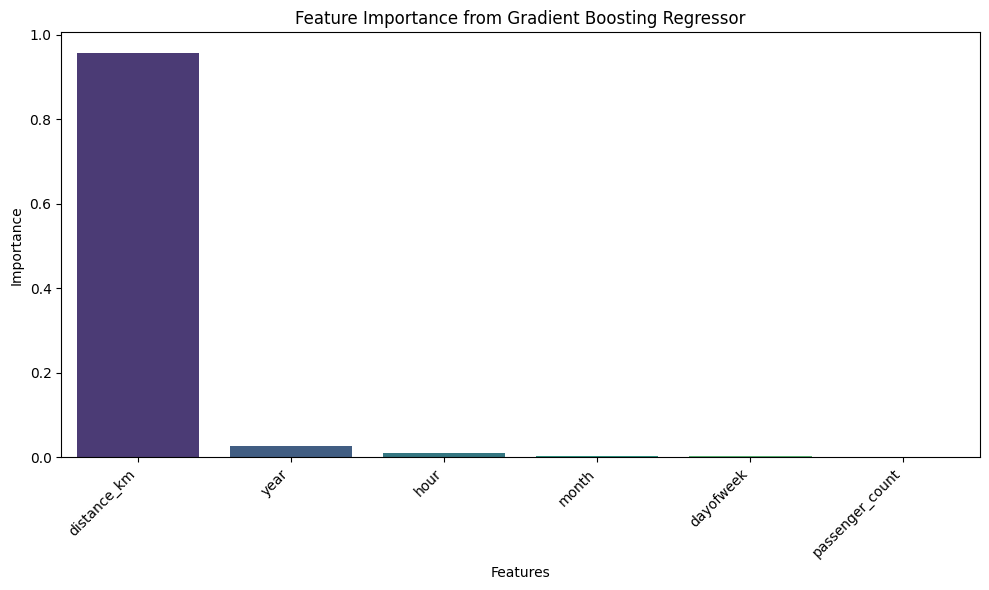

In [ ]:
# Visualising Features Importance from Final  Model
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=gbr_importance.index, y=gbr_importance.values, palette='viridis')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart clearly shows Distance is the driving Feature of this Model, supported by contextual modifiers such as year,hour.


Data-Driven Recommendations


DIstance is the key feature driving the model, so would suggest
maintain  distance based fare.

Also, distance is calculated basis geographic features such as Latitude and Longitude, and proper recording of these suggested.
Data was seen to have several rows with same LAT, Longitude for pickup and Dropoff. Not sure if it is data error. These could be avoided as these features indirectly matter.

This will also help  to pre-position drivers in high-demand areas.

Maintain surge pricing during peak hours and weekdays (temporal features influence fares).

Plan for future integration of traffic and weather data to anticipate delays and adjust fares or incentives.

Driver Incentives:
Offer bonuses or surge multipliers during high-demand hours to ensure driver availability.
Provide incentives for drivers covering under-served or low-demand areas to improve service balance.

  
Data-Driven Operations:

Monitor and focus on high-impact features (distance, location, hour) for better pricing and operational decisions.

model to re trained  to adapt to changing urban patterns, pricing policies, and demand trends.

Including external factors like fuel price, traffic, and weather could improve future fare prediction models.